In [79]:
from nepc import nepc
import numpy as np
import math
import matplotlib.pyplot as plt
from nepc.methods.wunderlich.gryzinski import gryzinski as gryzinski

In [80]:
INCIDENT_ENERGY = [16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0, 110.0, 120.0, 140.0, 160.0, 180.0, 200.0, 225.0, 250.0, 275.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0, 950.0, 1000.0]

In [81]:
sigma_naught = 6.56e-18

def gryzinski(N_e, E_e, E_thr, epsilon):
    """returns the cross section in terms of m^2
       N_e: the effective number of equivalent electrons in the inital state of the transistion
       E_e: inital energy of the impinging electron
       E_thr: lower limit of the energy gain or threshold energy
       epsilon: initial kinetic energy of the orbital electron to be excited; can be set to the ionization potential"""
    sigma = ((N_e * sigma_naught / E_thr**2) * np.sqrt(epsilon**2 * E_e / (epsilon + E_e)**3) * 
            (1 - (E_thr / E_e))**((2*epsilon + E_thr) / (epsilon + E_thr)) * 
            ((E_thr / epsilon) + (2 / 3) * (1 - (E_thr / (2 * E_e))) * np.log(np.exp(1) + np.sqrt((E_e - E_thr) / epsilon))))
    
    return sigma

In [84]:
sigma = gryzinski("N2(X1Sigmag+)", "N2+(X2Sigmag+)", 0, 2, 0.01, INCIDENT_ENERGY, epsilon=15.581)

In [85]:
sigma

(array([  16. ,   16.5,   17. ,   17.5,   18. ,   18.5,   19. ,   19.5,
          20. ,   20.5,   21. ,   21.5,   22. ,   22.5,   23. ,   23.5,
          24. ,   24.5,   25. ,   30. ,   35. ,   40. ,   45. ,   50. ,
          55. ,   60. ,   65. ,   70. ,   75. ,   80. ,   85. ,   90. ,
          95. ,  100. ,  110. ,  120. ,  140. ,  160. ,  180. ,  200. ,
         225. ,  250. ,  275. ,  300. ,  350. ,  400. ,  450. ,  500. ,
         550. ,  600. ,  650. ,  700. ,  750. ,  800. ,  850. ,  900. ,
         950. , 1000. ]),
 array([           nan, 8.99594991e-25, 3.00121580e-24, 5.62907924e-24,
        8.56969206e-24, 1.17027208e-23, 1.49495826e-23, 1.82553627e-23,
        2.15802453e-23, 2.48947514e-23, 2.81768101e-23, 3.14098321e-23,
        3.45813753e-23, 3.76821886e-23, 4.07055048e-23, 4.36465084e-23,
        4.65019263e-23, 4.92697093e-23, 5.19487824e-23, 7.40167510e-23,
        8.87999487e-23, 9.83421660e-23, 1.04259560e-22, 1.07685959e-22,
        1.09396467e-22, 1.09920630e-22

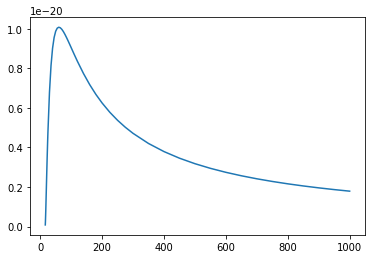

In [5]:
plt.plot(sigma[0], sigma[1])

In [75]:
from nepc import nepc
from nepc.util.constants import WAVENUMBER_PER_EV as WAVENUMBER_PER_EV
from nepc.util.constants import K_E as K_E
from nepc.util.constants import N2_DIATOMIC_CONSTANTS as N2_DIATOMIC_CONSTANTS
from nepc.methods.mp import Tv as Tv

N2_VALENCE = {'N2(X1Sigmag+)': {'N2+(X2Sigmag+)': 2, 'N2+(A2Piu)': 4, 'N2+(B2Sigmau+)': 2, 'N2+(C2Sigmau+)': 0}}

def gryzinski_test(p_state, pp_state, vp, vpp, fcf, electron_energy, epsilon=15.581):
    """returns the cross section in terms of m^2
       N_e: the effective number of equivalent electrons in the inital state of the transistion
       E_e: inital energy of the impinging electron
       E_thr: lower limit of the energy gain or threshold energy
       epsilon: initial kinetic energy of the orbital electron to be excited;
                can be set to the ionization potential"""
    sigma_naught = 6.56e-18

    N_e = N2_VALENCE[p_state][pp_state]

    p_To = N2_DIATOMIC_CONSTANTS[p_state]['To']
    p_we = N2_DIATOMIC_CONSTANTS[p_state]['we']
    p_wexe = N2_DIATOMIC_CONSTANTS[p_state]['wexe']

    pp_To = N2_DIATOMIC_CONSTANTS[pp_state]['To']
    pp_we = N2_DIATOMIC_CONSTANTS[pp_state]['we']
    pp_wexe = N2_DIATOMIC_CONSTANTS[pp_state]['wexe']

    Tv_vp = Tv(vp, p_To, p_we, p_wexe)
    Tv_vpp = Tv(vpp, pp_To, pp_we, pp_wexe)

    Tv_vppvp = Tv_vpp - Tv_vp
    E_thr = float(Tv_vppvp / WAVENUMBER_PER_EV)

    sigma_list = []
    for i in electron_energy:
        E_e = i
        
        T1 = (N_e * sigma_naught / E_thr**2)
        T2 = (epsilon**2 * E_e / (epsilon + E_e)**3)**0.5
        T3 = (1 - (E_thr / E_e))
        T4 = ((2*epsilon + E_thr) / (epsilon + E_thr))
        T5 = (E_thr / epsilon)
        T6 = (2 / 3) * (1 - (E_thr / (2 * E_e)))
        T7 = math.log(math.exp(1) + math.sqrt(abs(E_e - E_thr) / epsilon))
        Total = T1 * T2 * (T3**T4) * (T5 + (T6 * T7))
        
    return T1, T2, T3, T4, T5, T6, T7, Total

In [78]:
gryzinski_test("N2(X1Sigmag+)", "N2+(X2Sigmag+)", 0, 1, 0.917, [100], epsilon=15.581)

(5.404571222089424e-20,
 0.1253907950637424,
 0.8441932404284864,
 1.5000051993809491,
 0.999979202692469,
 0.6147310801428287,
 1.6185882816165231,
 1.048641254445501e-20)

In [ ]:
1.048641254445501e-20 + 